# Gradient Descent with Adaptive Gradients

1) AdaGrad is a modification of Stochastic Gradient Descent where the step sizes change for each calculation of gradient.

2) This allows for descents in different dimensions to have respectively different step sizes.

3) An advantage of AdaGrad is quicker optimization for complex n-dimensional first order differentiable objective functions.

In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
class AdaGrad():
    def __init__(self, lr = 1, iterations = 1000, epsilon = 1e-6):
        self.learning_rate = lr
        self.iterations = iterations
        self.eps = epsilon

    def h(self, X, theta):
        return np.dot(X, theta)

    def J(self, X, y, theta):
        m = X.shape[0]
        return (1 / m) * np.dot((self.h(X, theta) - y).T, self.h(X, theta) - y)

    def train(self, X, y, theta):
        m = X.shape[1]
        cost = []
        thetas = []
        it = []
        step_sizes = []
        epochs = 0
        title = 'AdaGrad Gradient Descent'
        g = np.zeros((m, 1))
        
        for e in range(self.iterations):

            for i in range(0, X.shape[0]):
                
                dt = (2*X[i] * (self.h(X[i], theta) - y[i])).reshape(2, 1)

                g += dt**2
                step_sizes.append(self.learning_rate/(np.sqrt(g + self.eps)))
                theta = theta - self.learning_rate/(np.sqrt(g + self.eps)) * dt
                epochs += 1

                thetas.append(theta)
                cost.append(self.J(X, y, theta)[0])
                it.append(epochs)

        weight_plot(thetas, it, title)
        cost_plot(cost, it, title)
        step_plot(step_sizes, it)

        return theta

In [169]:
def noise(arr):
    arr = arr + np.random.randn(arr.shape[0]) * 15
    return arr

In [170]:
def normalize(data):
    for i in range(0, data.shape[1]):
        data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:,i])

In [171]:
def plot_data(data, title):
    
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.scatter(data[:, 0], data[:, -1], c = 'mediumseagreen', alpha = 0.5)
    plt.title(title)
    
    plt.show()

In [172]:
def cost_plot(cost, iterations, title):
    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.plot(iterations, cost)
    plt.title(title)
    
    plt.show()

In [173]:
def weight_plot(w, it, title):
    
    t = []
    b = []
    
    for i in w:
    
        t.append(i[1])
        b.append(i[0])
    
    plt.xlabel('Iterations')
    plt.ylabel('Weights')
    plt.plot(it, t, color = 'blue', label = 'Weight')
    plt.plot(it, b, color = 'red', label = 'Bias')
    plt.legend()
    plt.title(title)
    plt.show()

In [174]:
def step_plot(w, it):
    
    t = []
    b = []
    
    for i in w:
    
        t.append(i[1])
        b.append(i[0])
    
    plt.xlabel('Iterations')
    plt.ylabel('Steps')
    plt.plot(it, t, color = 'blue', label = 'Steps in Theta[1]')
    plt.plot(it, b, color = 'red', label = 'Steps in Theta[0]')
    plt.legend()
    plt.title('Steps in AdaGrad')
    plt.show()

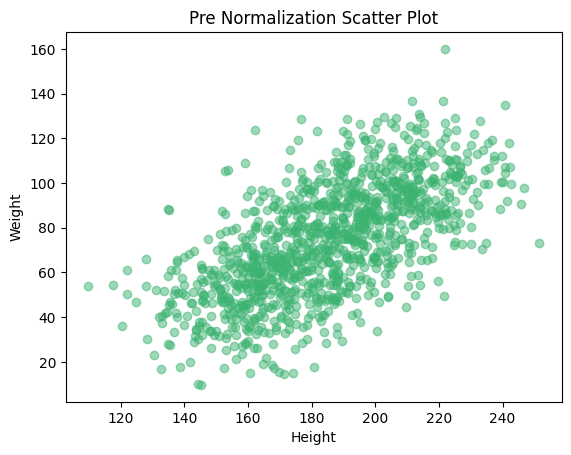

In [175]:
height = noise(np.arange(150, 220, 0.0625))
weight = noise(np.arange(40, 110, 0.0625))

data = np.column_stack((height, weight))
np.random.shuffle(data)
plot_data(data, 'Pre Normalization Scatter Plot')

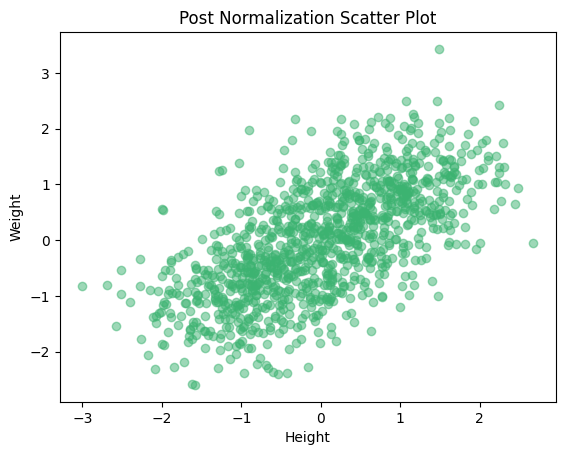

In [176]:
normalize(data)
plot_data(data, 'Post Normalization Scatter Plot')

In [177]:
X = data[:, 0].reshape((1120, 1))
y = data[:, -1].reshape((1120, 1))

b = np.ones((X.shape[0], 1), dtype = 'float')
X = np.column_stack((b, X))

print(f'X shape: {X.shape}\t', f'y shape: {y.shape}')

X shape: (1120, 2)	 y shape: (1120, 1)


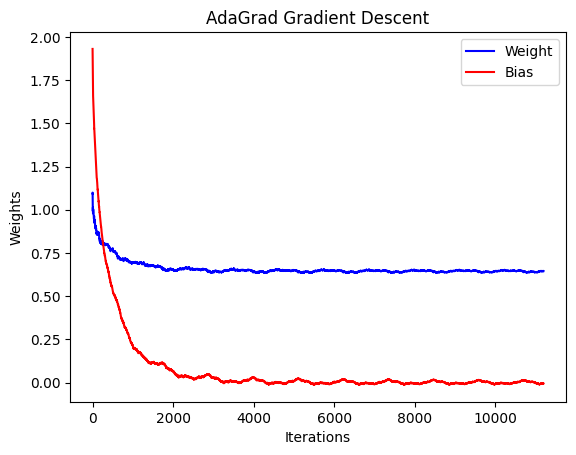

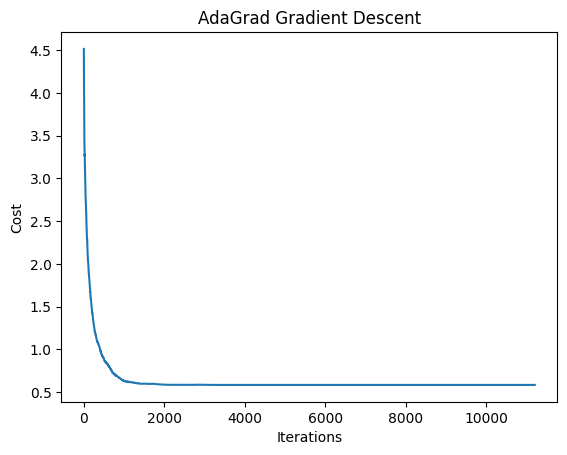

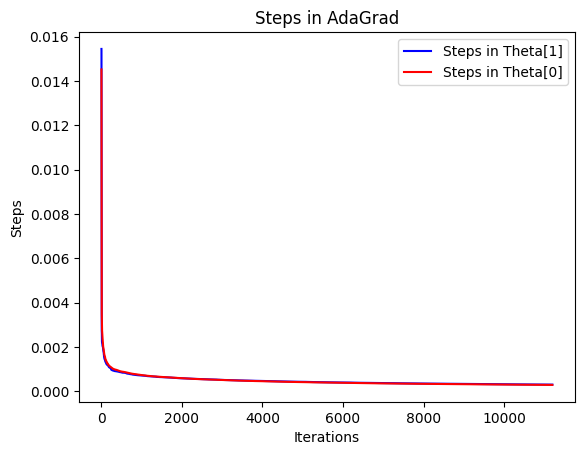

array([[-0.00623837],
       [ 0.64482153]])

In [181]:
theta = np.random.randn(2,1)
ada = AdaGrad(lr=0.05, iterations=10)
ada.train(X, y, theta)

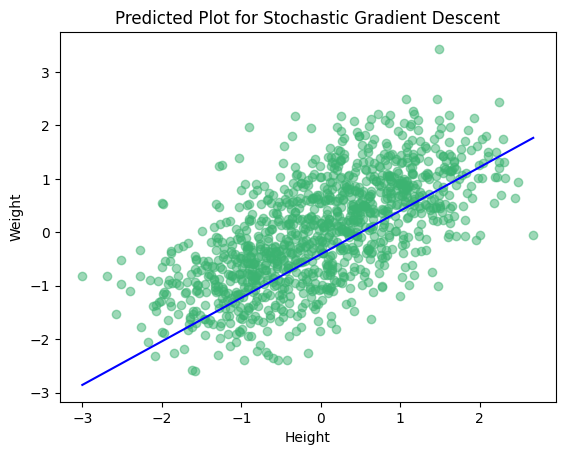

In [180]:
x = np.linspace(np.min(X),np.max(X), X.shape[0]).reshape(X.shape[0],1)
yline = np.dot(x, theta[0]) + theta[1]
plt.plot(x, yline, c = 'blue')
plot_data(data, 'Predicted Plot for Stochastic Gradient Descent')